# 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size = 100)

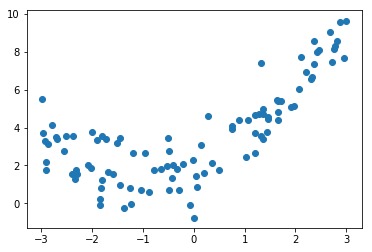

In [3]:
plt.scatter(x,y)

### 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.4953707811865009

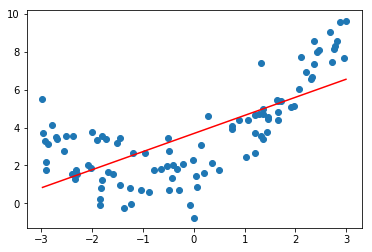

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color = 'r')

In [6]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

3.0750025765636577

### 使用多项式回归

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree = degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [8]:
poly_reg = PolynomialRegression(degree = 2)
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [9]:
y_predict2 = poly_reg.predict(X)
mean_squared_error(y,y_predict2)

1.0987392142417856

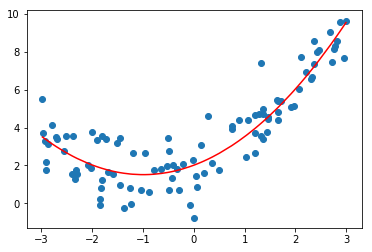

In [10]:

plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color = 'r')

In [11]:
poly_reg10 = PolynomialRegression(degree = 10)
poly_reg10.fit(X,y)
y_predict10 = poly_reg10.predict(X)
mean_squared_error(y,y_predict10)

1.0508466763764168

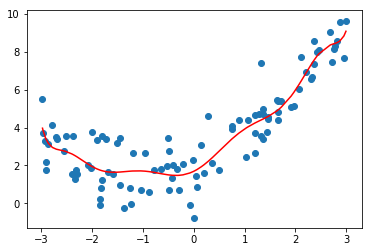

In [12]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict10[np.argsort(x)],color = 'r')

In [13]:
poly_reg100 = PolynomialRegression(degree = 100)
poly_reg100.fit(X,y)
y_predict100 = poly_reg100.predict(X)
mean_squared_error(y,y_predict100)

0.6875194808889498

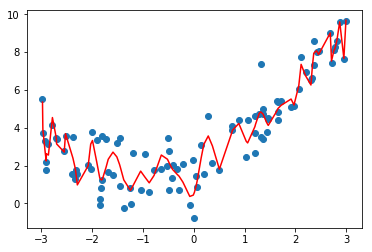

In [14]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict100[np.argsort(x)],color = 'r')

In [16]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg100.predict(X_plot)

[-3, 3, -1, 10]

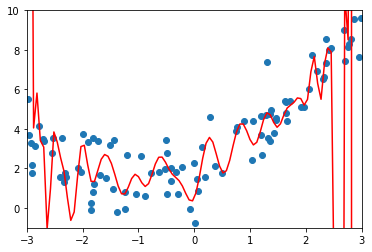

In [17]:
plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,-1,10])